# Modeling with SKLearn

## Logistic Regression

Let's start with something straightforward: classification with logistic regression.

In [40]:
import pandas as pd

# set up our sklearn data shape for the iris data
df = pd.read_csv("assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# set up our model
# we pick the hyper-parameter C to give us the best results
# on the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0)

# train the model
model.fit(X, y)

# check out the training error
print("Training Accuracy {}%".format(model.score(X, y)*100))

df['Species'].value_counts()

Training Accuracy 98.0%


setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

## Model Evaluation

## Learning Curves

* It can be shown that *any model* can learn its training data perfectly - “memorize it”
* But memorizing is not the same as learning inherent patterns and use those patterns to make predictions!

> Memorization does not generalize well!



If we train a model using *training data* and then apply the model to a *validation data set* then we obtain these following typical curves:

<!-- ![model curves](assets/model-performance-curves.png) -->

<img src="assets/model-performance-curves.png"  height="200" width="400">

Note: Validation data is data that the model has not seen yet. SKlearn calls it testing data.

Simply put:

1. Undertrained models make a lot of errors on validation data because they have not learned any of the patterns yet.

2. Overtrained models (models that have memorized their training data) make a lot of errors on validation data because they believe the noise in the data are patterns.

3. The best models make a trade-off between errors and recognizing important patterns. Notice that for the best models the training score is not 100%!

## Train-Test

In [30]:
import pandas as pd

# import the function we need to train-test
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# set up our model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0)

# set up our sklearn data shape for the iris data
df = pd.read_csv("assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# fit the model on the training set of data
model.fit(X_train, y_train)

# evaluate the model on the testing set of data
y_test_model = model.predict(X_test)

# output the results
print("Accuracy: {}".format(accuracy_score(y_test, y_test_model)))

Accuracy: 0.9333333333333333


>The hyper-parameters that gave us the best results on the training data do not necessarily give us the best results on the testing data. 
> We can use train-test as a way to **search** for hyper-parameters that give use the best **testing results**.

## Cross-Validation

### Problem!

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a ‘bad’ split your results might be biased,

**Solution:** cross-validation



As a solution to a single bad split -- perform the split multiple times -- then train and test -- take the average

Example: 
* 5-fold CV - split the training data into 5 splits (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src="assets/5fold-xval.png" height="200" width="400">



In [31]:
import pandas as pd
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv("assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# set up our model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {}".format(scores.mean()))

Fold Accuracies: [ 1.          1.          0.93333333  0.93333333  1.        ]
Accuracy: 0.9733333333333334


# Model Evaluation - the Grid Search

Where did our model parameters come from in the above examples?  We searched for them!  Therefore:

* Finding the best model involves searching for (hyper-)parameter values that give you the best testing/cross-validation accuracy.
* This is usually referred to as the *grid search*.

Sklearn helps us do that efficiently:
* Sklearn has a built-in grid search that can optimize the model parameters
* The tree has two parameters: criterion and depth
* The grid search will find the optimal value for both of these parameters



In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv("assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# setting up grid search
model = LogisticRegression(max_iter=10000) 
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# Get the accuracy
# Evaluate the best model
# predicting        
predict_y = grid.best_estimator_.predict(X)
actual_y = y

# accuracy          
print("Accuracy: {}".format(accuracy_score(actual_y, predict_y)))

Best parameters: {'C': 100.0, 'solver': 'liblinear'}
Accuracy: 0.98


# Model Accuracy Reexamined

Consider a classification problem with two classes, then we observe the following outcomes of a prediction of a suitable classification model:

>true positive (TP)

>true negative (TN)

>false positive (FP), Type I error

>false negative (FN), Type II error

Two types of errors possible!



<img src="assets/confusion2.png" height="400" width="800">

In [41]:
from sklearn.metrics import confusion_matrix

# Evaluate our model
# predicting        
predict_y = grid.best_estimator_.predict(X)
actual_y = y

# accuracy          
print("Accuracy: {}".format(accuracy_score(actual_y, predict_y)))

# build the confusion matrix 
labels = ['versicolor','virginica','setosa']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))


Accuracy: 0.98
Confusion Matrix:
            versicolor  virginica  setosa
versicolor          48          2       0
virginica            1         49       0
setosa               0          0      50


Since the Iris data set has three labels it is not possible to talk about TN and TP etc but we can still see where the classifier makes mistakes.  We can see that it makes mistakes in the *versicolor* and *virginica* classes but classifies *setosa* correctly.

This is corroborated by a look at the scatter plots.

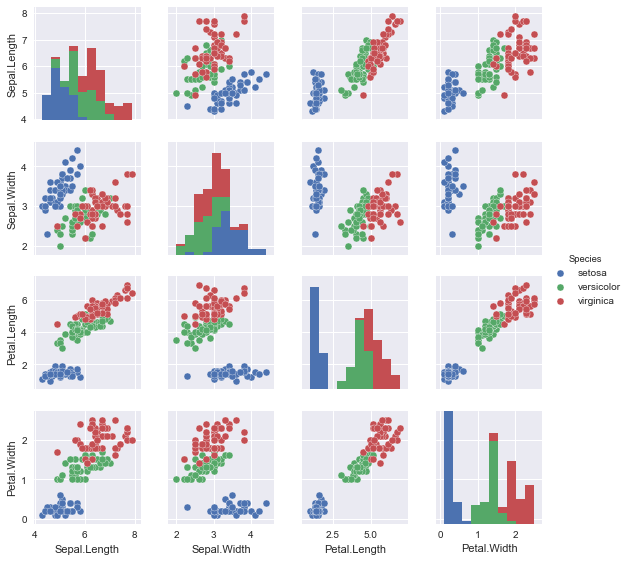

In [44]:
import seaborn as sns
sns.set()
sns.pairplot(df.drop(['id'],axis=1), hue='Species', size=2)

Here we can see that 'setosa' forms a well defined cluster but the other two species form clusters not so well defined.

## Confidence Intervals

First, let us define error confidence intervals formally.

Given a model accuracy, *acc*, over some data set D, then the error confidence interval is defined as the probability *p* that our model accuracy acc lies between some lower bound *lb* and some upper bound *ub*,

> Pr(*lb* ≤ *acc* ≤ *ub*) = *p*. 

Paraphrasing this equation with *p* = 95%:

> We are 95% percent sure that our accuracy *acc* is not worse than *lb* and not better than *ub*.


### Boostrapping Confidence Intervals

The bootstrapping procedure for *p* = 95%,

```
given data set D
given model M
for i = 1 to 200 do
    B[i] ← sample D with replacement, note |B[i]| = |D|.
    acc[i] ← compute model M accuracy for B[i]. 
end for
sort acc in ascending fashion
ub ← percentile(acc, 97.5)
lb ← percentile(acc, 2.5)
return (lb, ub)

```

In [48]:
from bootstrap import bootstrap
lb, ub = bootstrap(grid.best_estimator_, df.drop(['id'],axis=1), 'Species')
print("Confidence interval: ({0:.2f}%, {1:.2f}%)".format(lb*100,ub*100))

Confidence interval: (90.00%, 100.00%)
